# ENGR 1330 – Computational Thinking and Data Science

## HVAC Energy Predictor Final Project - Background

About 25% to 50%  of the total energy consumption by residential buildings are taken by Heating Ventilation and Air Conditioning (HVAC) systems. Architectural design factors involving size, shape and orientation of buildings significantly affect the heating and cooling load. A systematic study on dependence of heating and cooling load on architectural features can lead to energy efficient home design.  


Before you begin, read the description of the dataset here: https://archive.ics.uci.edu/dataset/242/energy+efficiency

## Objective(s):

- Literature scan on HVAC systems and their efficiency
- Analyse an existing  database and build data models to predict the heating load and cooling load
- Build an interface to allow users to enter and return an estimated  and an assessment of the uncertainty in the estimate
- Build an interface to allow users to add observations to the underlying database, and automatically update the Data Model to incorporate the new observations

## Tasks:

**Literature Research:**
- Briefly describe the challenge of minimizing residential HVAC energy consumption
- Summarize the value of a data model in the context of the conventional approach to HVAC energy prediction

Some places to start are:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9571769/

https://www.sciencedirect.com/science/article/pii/S1364032114007151
    
https://www.mdpi.com/1424-8220/20/22/6419



**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build 2 separate data models to estimate the heating load and the cooling load based on the appropriate architectural features given in your dataset
- Assess the model quality
- Build the input data interface for using the model
- Using your model determine projected heating load and cooling load for 3 possible feature combinations in the table below:

![image.png](attachment:image.png)


               
       
**Documentation**
- Training video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf.
- Final ipynb file (see deliverables below)

## Deliverables:

#### Part 1 Interim Report (due Dec 1):
A report that briefly describes the project. Use the Interim Report Template in BlackBoard.  
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart) or list of meeting times.
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)  

#### Part 2 Final Report (due Dec 10):
- A well-documented JupyterLab (using a python kernel), use markdown cells and commenting for explanations and text.
- A how-to video demonstrating performance and description of problems that you were not able to solve and also talk about project management such as who did what. Active participation of every single group member is mandatory in the presentation.
- A final peer evaluation report, where each group member should rate the participation and contribution of the other members.

**Above items can reside in a single video; but structure the video into the two parts; use an obvious transition when moving from "how to ..." into the project management portion.**  Keep the total video length to less than 10 minutes; submit as an *unlisted* YouTube video, and just supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind a 10 minute video can approach 100MB file size before compression, so it won't upload to Blackboard and cannot be emailed.

**A command to ignore warnings.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Code to import all necessary libraries needed for this project.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

**Read the provided DataFrame and remove the column with N/A variables. Also included is the code to rename the columns of the DataFrame to their respective titles.**

In [ ]:
energy = pd.read_csv("ENB2012data.csv")
energy.drop("Unnamed: 10", axis=1, inplace=True)

In [ ]:
energy.rename(columns={"X1" : "Relative Compactness", "X2" : "Surface Area", "X3" : "Wall Area", "X4" : "Roof Area", "X5" : "Overall Height", "X6" : "Orientation", "X7" : "Glazing Area", "X8" : "Glazing Area Distribution", "Y1" : "Heating Load", "Y2" : "Cooling Load"}, inplace = True)

In [ ]:
energy

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
760,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
761,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
762,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
763,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Display statistical and basic information about the DataFrame.**

In [ ]:
energy.info()
energy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       765 non-null    float64
 1   Surface Area               765 non-null    float64
 2   Wall Area                  765 non-null    float64
 3   Roof Area                  765 non-null    float64
 4   Overall Height             765 non-null    float64
 5   Orientation                765 non-null    int64  
 6   Glazing Area               765 non-null    float64
 7   Glazing Area Distribution  765 non-null    int64  
 8   Heating Load               765 non-null    float64
 9   Cooling Load               765 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 59.9 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.764497,671.428105,318.307843,176.560131,5.252288,3.499346,0.234902,2.813072,22.319765,24.601412
std,0.105789,88.061549,43.531519,45.156349,1.751143,1.120519,0.133215,1.550321,10.088787,9.511863
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,2.000000,0.100000,2.000000,13.000000,15.640000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000,19.000000,22.090000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.660000,33.130000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


**Displays the heatmap for the correlation values in the DataFrame. Allows us to see what correlates with what mathematically.**

Text(0.5, 1.0, 'Feature Correlation Heatmap')

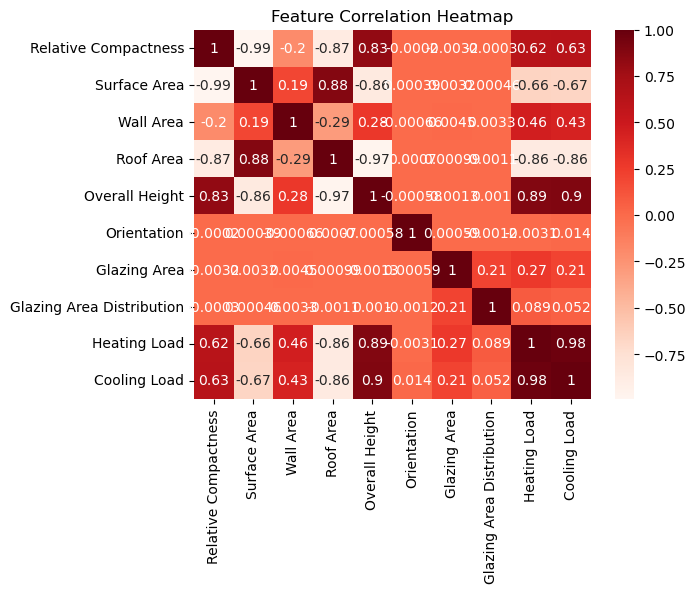

In [ ]:
num_col = energy.select_dtypes(include=["float64", "int64"]) #Stole this code from my Assignment 8
corr = num_col.corr() #Modified code from lecture demo
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Feature Correlation Heatmap")

**Seaborn pairplot that displays all possible combinations of graphs. Allows us to see correlation visually to choose what features change heating/cooling load the most.**

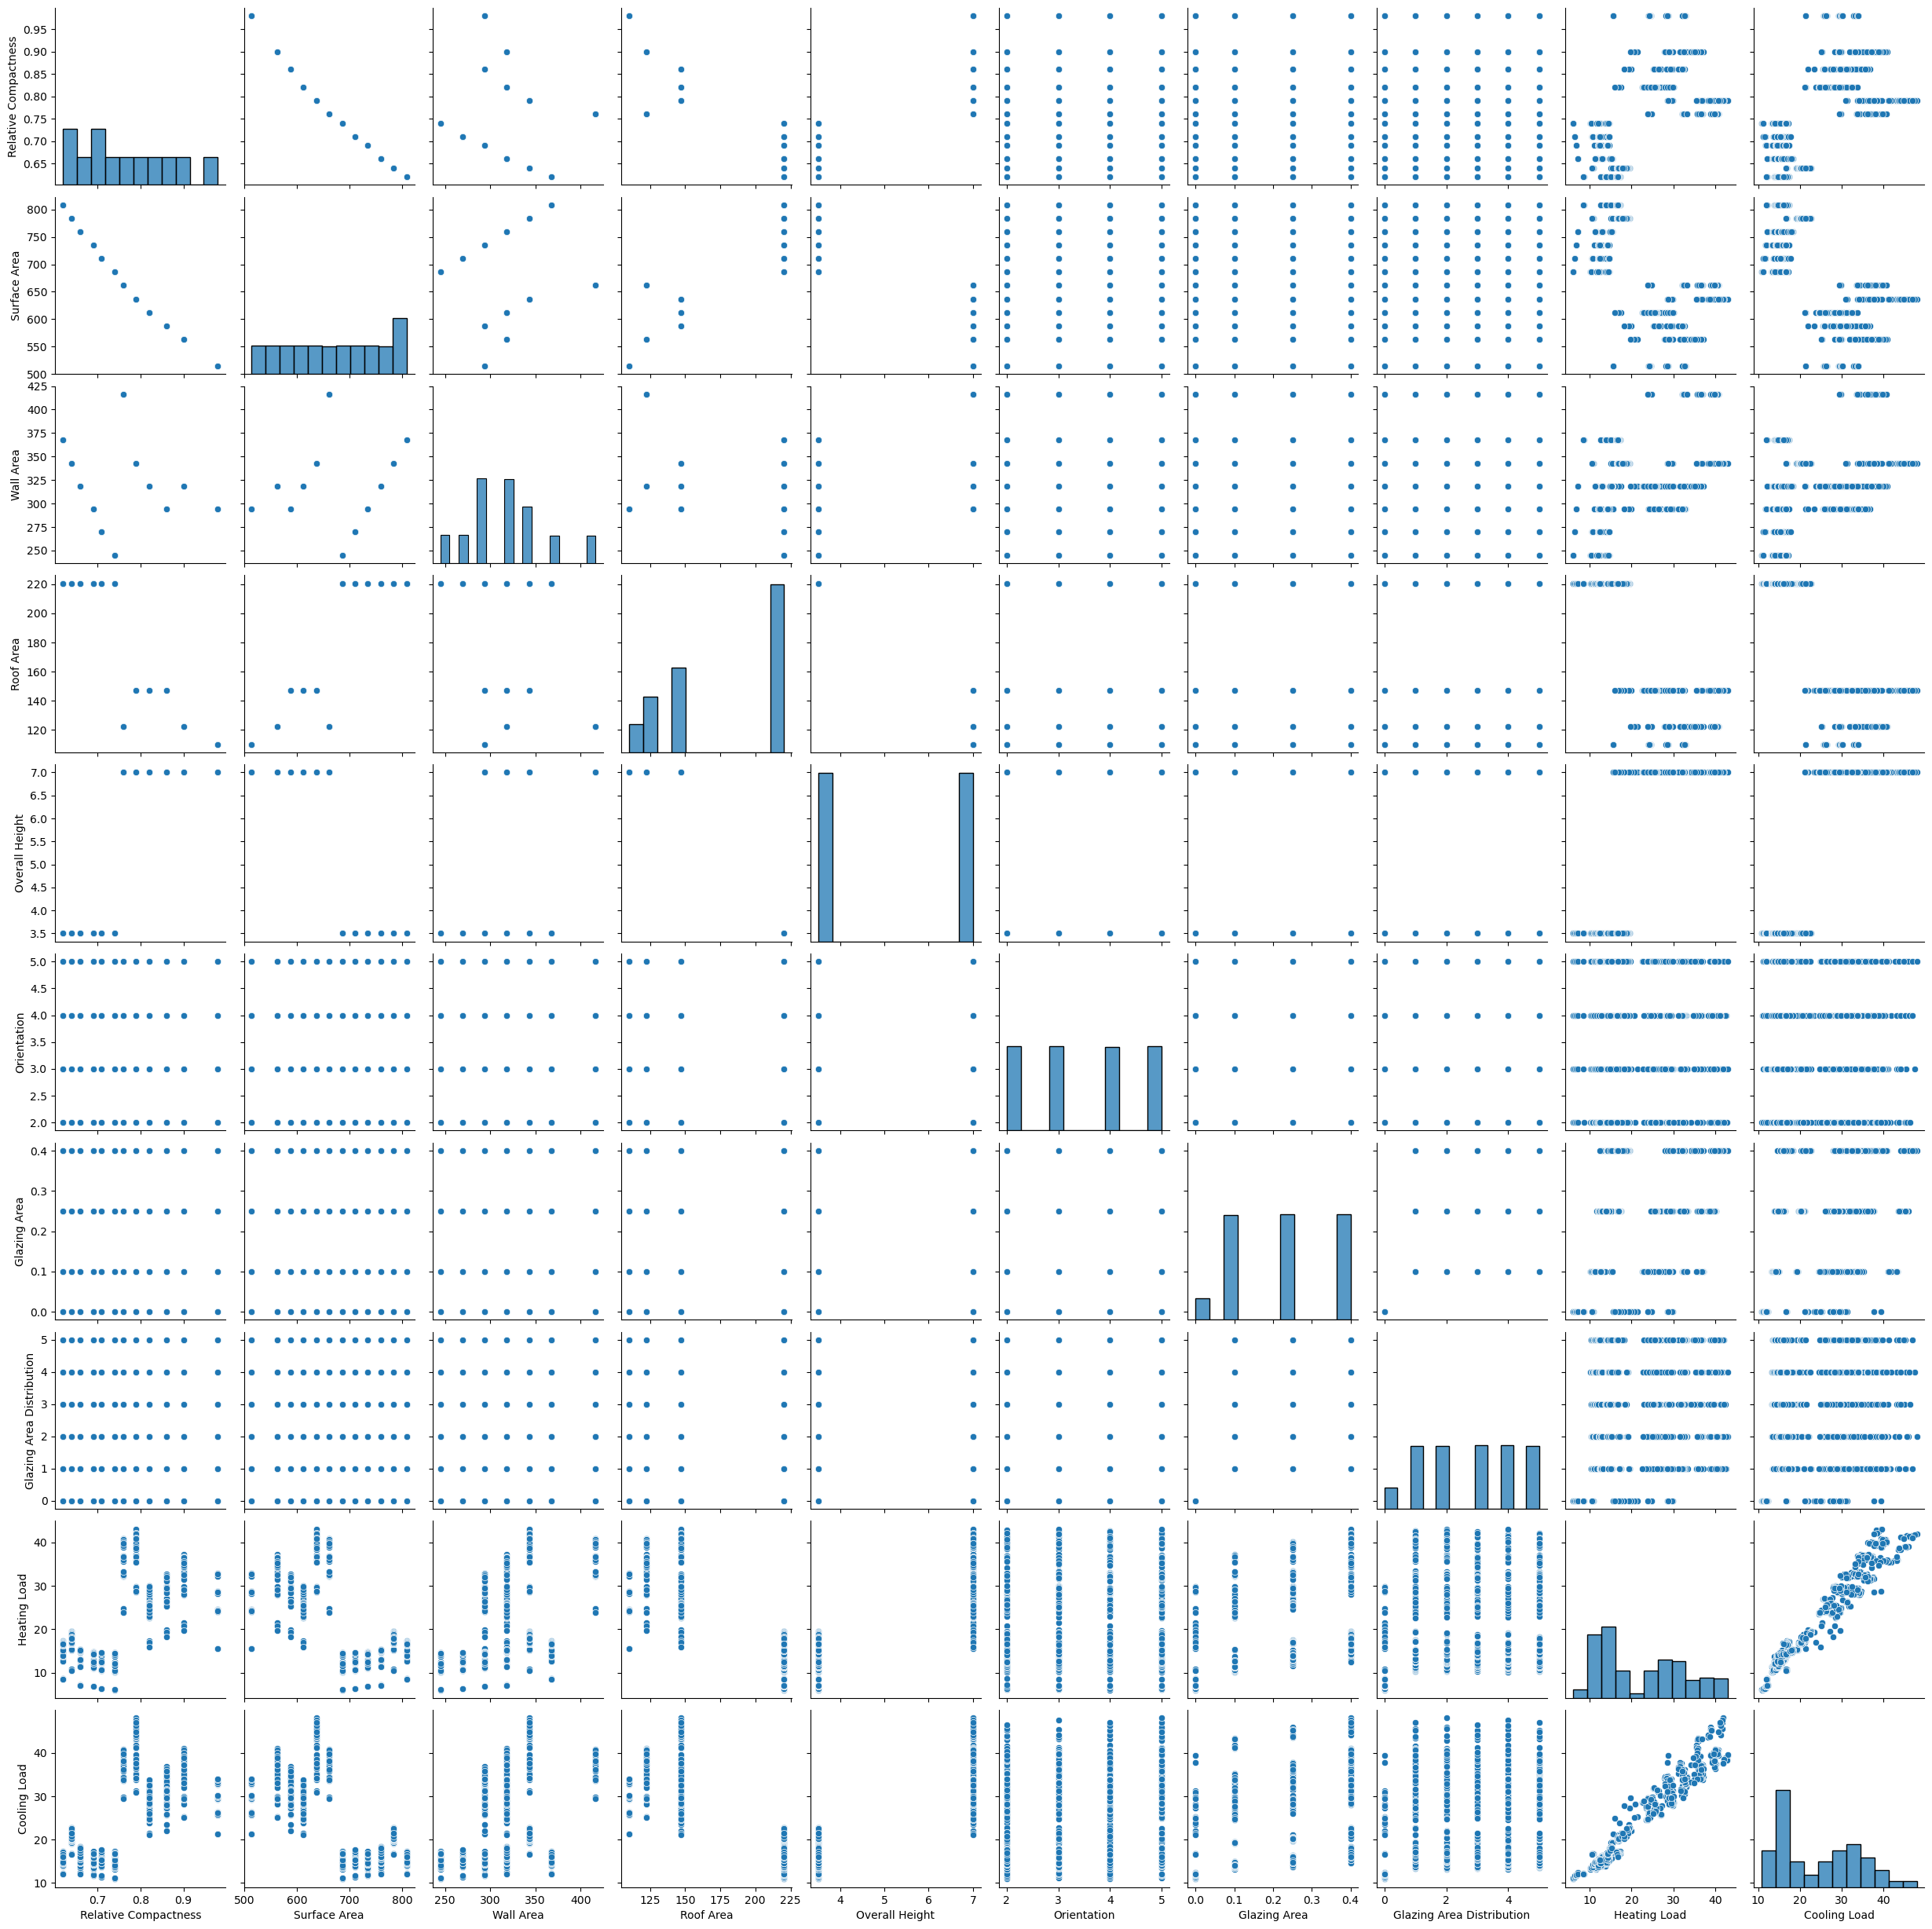

In [ ]:
sns.pairplot(energy)

**Narrow the DataFrame columns to only the features we are using and the results we are checking.**

In [ ]:
data = energy.copy()
data = energy[["Relative Compactness", "Surface Area", "Wall Area", "Heating Load", "Cooling Load"]]
data.head()
data.describe()

,Relative Compactness,Surface Area,Wall Area,Heating Load,Cooling Load
count,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.764497,671.428105,318.307843,22.319765,24.601412
std,0.105789,88.061549,43.531519,10.088787,9.511863
min,0.620000,514.500000,245.000000,6.010000,10.900000
25%,0.690000,588.000000,294.000000,13.000000,15.640000
50%,0.760000,661.500000,318.500000,19.000000,22.090000
75%,0.860000,735.000000,343.000000,31.660000,33.130000
max,0.980000,808.500000,416.500000,43.100000,48.030000


**Getting the standard unit values for all columns being used.**

In [ ]:
data['Relative Compactness (standard units)'] = (data['Relative Compactness'] - np.mean(data['Relative Compactness']))/(np.std(data['Relative Compactness']))
data['Surface Area (standard units)'] = (data['Surface Area'] - np.mean(data['Surface Area']))/(np.std(data['Surface Area']))
data['Wall Area (standard units)'] = (data['Wall Area'] - np.mean(data['Wall Area']))/(np.std(data['Wall Area']))
data['Heating Load (standard units)'] = (data['Heating Load'] - np.mean(data['Heating Load']))/(np.std(data['Heating Load']))
data['Cooling Load (standard units)'] = (data['Cooling Load'] - np.mean(data['Cooling Load']))/(np.std(data['Cooling Load']))
data.head()

,Relative Compactness,Surface Area,Wall Area,Heating Load,Cooling Load,Relative Compactness (standard units),Surface Area (standard units),Wall Area (standard units),Heating Load (standard units),Cooling Load (standard units)
0,0.98,514.5,294.0,15.55,21.33,2.038441,-1.783193,-0.558762,-0.671458,-0.344155
1,0.98,514.5,294.0,15.55,21.33,2.038441,-1.783193,-0.558762,-0.671458,-0.344155
2,0.98,514.5,294.0,15.55,21.33,2.038441,-1.783193,-0.558762,-0.671458,-0.344155
3,0.98,514.5,294.0,15.55,21.33,2.038441,-1.783193,-0.558762,-0.671458,-0.344155
4,0.90,563.5,318.5,20.84,28.28,1.281723,-1.226400,0.004417,-0.146770,0.386990


## Heating Load Simulation

**Specify what features will be applied to what constant.**

In [ ]:
x = energy[["Relative Compactness", "Surface Area", "Wall Area"]]
y = energy["Heating Load"]

**Train-test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.coef_)
print(lm.intercept_)


[-133.63727223   -0.24646565    0.13694648]
246.29457567093948


**Apply Polynomial Regression for train and test set.**

In [ ]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

pol_reg = LinearRegression()
pol_train = pol_reg.fit(x_train_poly, y_train)
pol_test = pol_reg.fit(x_test_poly, y_test)

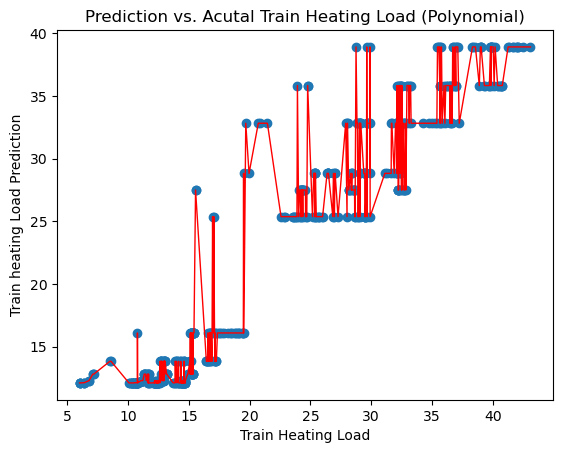

In [ ]:

y_train_pred_poly = pol_reg.predict(x_train_poly)

sorted_indices = np.argsort(y_train)
y_train_sorted = y_train.iloc[sorted_indices]
y_train_pred_poly_sorted = y_train_pred_poly[sorted_indices]

plt.scatter(y_train, y_train_pred_poly, label='Actual vs. Predicted')
plt.plot(y_train_sorted, y_train_pred_poly_sorted, color='r', lw=1, label='Best Fit Curve')
plt.xlabel("Train Heating Load")
plt.ylabel("Train heating Load Prediction")
plt.title("Prediction vs. Acutal Train Heating Load (Polynomial)")
plt.show()

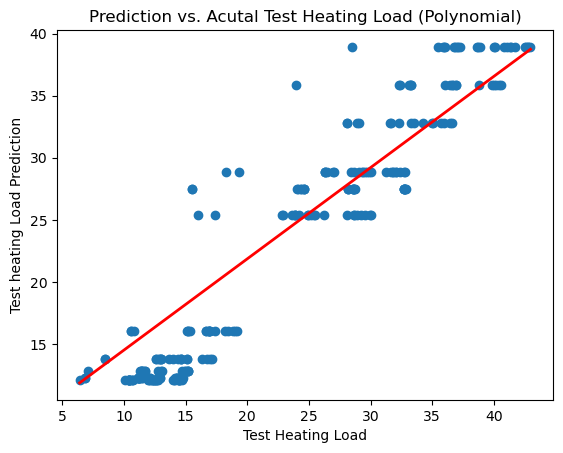

In [ ]:
y_test_pred_poly = pol_reg.predict(x_test_poly)
y_test_pred = lm.predict(x_test)

sorted_indices = np.argsort(y_test)
y_test_sorted = y_train.iloc[sorted_indices]
y_test_pred_poly_sorted = y_test_pred_poly[sorted_indices]

plt.scatter(y_test, y_test_pred_poly, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'r', lw=2)
plt.xlabel("Test Heating Load")
plt.ylabel("Test heating Load Prediction")
plt.title("Prediction vs. Acutal Test Heating Load (Polynomial)")
plt.show()

**Compare to Linear Regression of test set.**

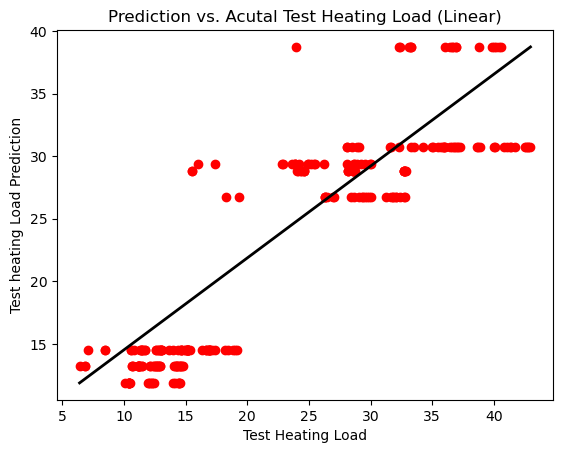

In [ ]:
y_test_pred = lm.predict(x_test)

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Test Heating Load")
plt.ylabel("Test heating Load Prediction")
plt.title("Prediction vs. Acutal Test Heating Load (Linear)")
plt.show()

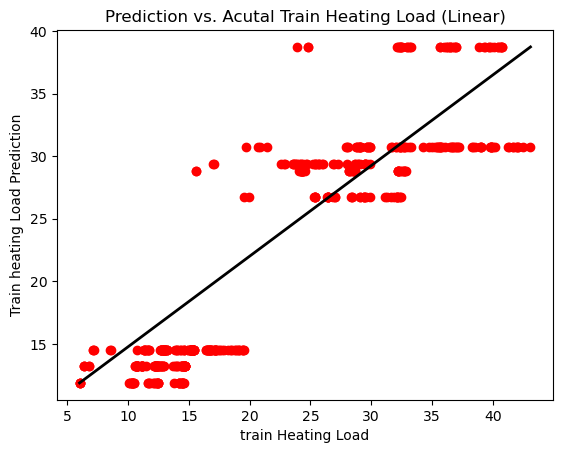

In [ ]:
y_train_pred = lm.predict(x_train)

plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("train Heating Load")
plt.ylabel("Train heating Load Prediction")
plt.title("Prediction vs. Acutal Train Heating Load (Linear)")
plt.show()

**Calculate MSE and RMSE values for train and test sets.**

In [ ]:
MSE_train_lin = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train_lin = np.sqrt(MSE_train_lin)

MSE_train_poly = metrics.mean_squared_error(y_train, y_train_pred_poly)
RMSE_train_poly = np.sqrt(MSE_train_poly)

print("MSE value from Linear Regression:", MSE_train_lin)
print("MSE value from Polynomial Regression:", MSE_train_poly)

print("RMSE value from Linear Regression:", RMSE_train_lin)
print("RMSE value from Polynomial Regression:", RMSE_train_poly)

MSE value from Linear Regression: 16.80630531978115
MSE value from Polynomial Regression: 9.527375086642268
RMSE value from Linear Regression: 4.099549404481077
RMSE value from Polynomial Regression: 3.086644632386804


In [ ]:
MSE_test_lin = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test_lin = np.sqrt(MSE_test_lin)

MSE_test_poly = metrics.mean_squared_error(y_test, y_test_pred_poly)
RMSE_test_poly = np.sqrt(MSE_test_poly)

print("MSE value from Linear Regression:", MSE_test_lin)
print("MSE value from Polynomial Regression:", MSE_test_poly)

print("RMSE value from Linear Regression:", RMSE_test_lin)
print("RMSE value from Polynomial Regression:", RMSE_test_poly)

MSE value from Linear Regression: 19.740105695116455
MSE value from Polynomial Regression: 9.541354160383829
RMSE value from Linear Regression: 4.442983872930045
RMSE value from Polynomial Regression: 3.0889082473236122


## Cooling Load Simulation

In [ ]:
x = energy[["Relative Compactness", "Surface Area", "Wall Area"]]
y = energy["Cooling Load"]

**Train-test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.coef_)
print(lm.intercept_)


[-1.51042402e+02 -2.65157544e-01  1.23047598e-01]
278.9971193212729


**Apply Polynomial Regression for train and test set.**

In [ ]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

pol_reg = LinearRegression()
pol_train = pol_reg.fit(x_train_poly, y_train)
pol_test = pol_reg.fit(x_test_poly, y_test)

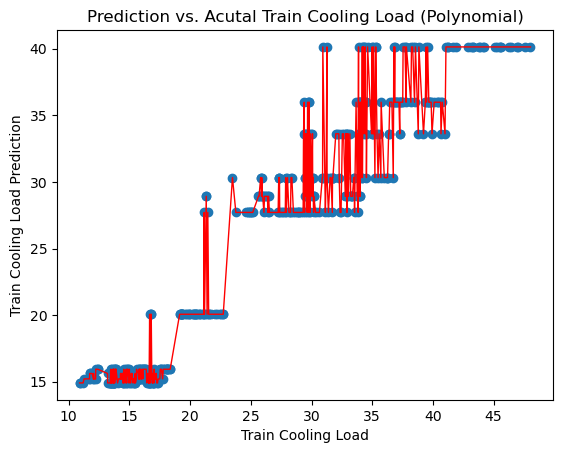

In [ ]:
y_train_pred_poly = pol_reg.predict(x_train_poly)

sorted_indices = np.argsort(y_train)
y_train_sorted = y_train.iloc[sorted_indices]
y_train_pred_poly_sorted = y_train_pred_poly[sorted_indices]

plt.scatter(y_train, y_train_pred_poly, label='Actual vs. Predicted')
plt.plot(y_train_sorted, y_train_pred_poly_sorted, color='r', lw=1, label='Best Fit Curve')
plt.xlabel("Train Cooling Load")
plt.ylabel("Train Cooling Load Prediction")
plt.title("Prediction vs. Acutal Train Cooling Load (Polynomial)")
plt.show()

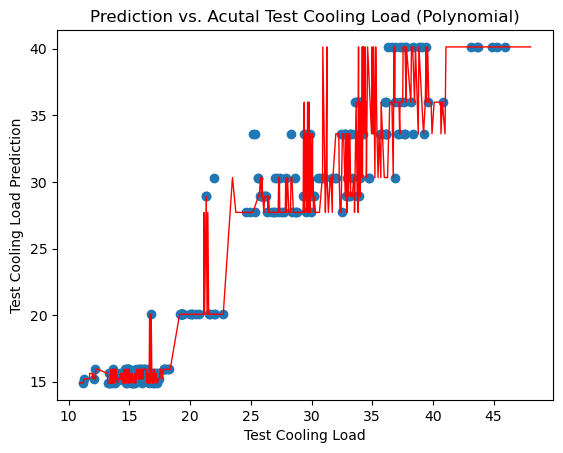

In [ ]:
y_test_pred_poly = pol_reg.predict(x_test_poly)
y_test_pred = lm.predict(x_test)

sorted_indices = np.argsort(y_test)
y_test_sorted = y_train.iloc[sorted_indices]
y_test_pred_poly_sorted = y_test_pred_poly[sorted_indices]

plt.scatter(y_test, y_test_pred_poly, label='Actual vs. Predicted')
#plt.plot(y_test_pred_poly_sorted, y_test_sorted, color='r', lw=1, label='Best Fit Curve')
plt.plot(y_train_sorted, y_train_pred_poly_sorted, color='r', lw=1, label='Best Fit Curve')
plt.xlabel("Test Cooling Load")
plt.ylabel("Test Cooling Load Prediction")
plt.title("Prediction vs. Acutal Test Cooling Load (Polynomial)")
plt.show()

**Compare to Linear Regression of test set.**

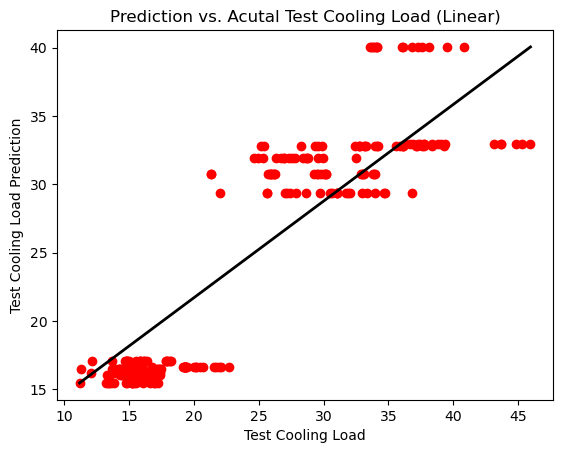

In [ ]:
y_test_pred = lm.predict(x_test)

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Test Cooling Load")
plt.ylabel("Test Cooling Load Prediction")
plt.title("Prediction vs. Acutal Test Cooling Load (Linear)")
plt.show()

**Calculate MSE and RMSE values for train and test sets.**

In [ ]:
MSE_train_lin = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train_lin = np.sqrt(MSE_train_lin)

MSE_train_poly = metrics.mean_squared_error(y_train, y_train_pred_poly)
RMSE_train_poly = np.sqrt(MSE_train_poly)

print("MSE value from Linear Regression:", MSE_train_lin)
print("MSE value from Polynomial Regression:", MSE_train_poly)

print("RMSE value from Linear Regression:", RMSE_train_lin)
print("RMSE value from Polynomial Regression:", RMSE_train_poly)

MSE value from Linear Regression: 194.59891461780313
MSE value from Polynomial Regression: 7.738485932014642
RMSE value from Linear Regression: 13.949871491085613
RMSE value from Polynomial Regression: 2.7818134250906623


In [ ]:
MSE_test_lin = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test_lin = np.sqrt(MSE_test_lin)

MSE_test_poly = metrics.mean_squared_error(y_test, y_test_pred_poly)
RMSE_test_poly = np.sqrt(MSE_test_poly)

print("MSE value from Linear Regression:", MSE_test_lin)
print("MSE value from Polynomial Regression:", MSE_test_poly)

print("RMSE value from Linear Regression:", RMSE_test_lin)
print("RMSE value from Polynomial Regression:", RMSE_test_poly)

MSE value from Linear Regression: 13.488788372291932
MSE value from Polynomial Regression: 6.064980077175737
RMSE value from Linear Regression: 3.6727085879895145
RMSE value from Polynomial Regression: 2.462718026322895
